# Data Base Breach Analysis

@mttwdevelops

August 11, 2022

Data Source: https://en.wikipedia.org/wiki/List_of_data_breaches

Source Scraper: https://github.com/mttwdevelops/Practice-Files/blob/master/Data_Breach_Analysis/db_breach_webscrape.py



The topic of this analysis is on largely-public database breaches recorded between the years of 2004 to now. 

The scope of this analysis is to look at different variables from the data such as *Organization type*, *Method*, *Records*, and *Year* to identify any common patterns or interesting outliers, as well as to 

The scraper file is provided above, and can be run at any time before running this file to get an up-to-date listing. 

For any further questions on the data source's sources, refer to the provided **Data Source** link provided.

In [21]:
# Libraries imported:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [67]:
# Importing the data:
df = pd.read_csv("databreachleaks.csv")
df.head()
# df.describe

,Unnamed: 0,Entity,Year,Records,Organization type,Method,Sources
0,0,21st Century Oncology,2016,2200000,healthcare,hacked,[5][6]
1,1,500px,2020,14870304,social networking,hacked,[7]
2,2,Accendo Insurance Co.,2020,175350,healthcare,poor security,[8][9]
3,3,Adobe Systems Incorporated,2013,152000000,tech,hacked,[10]
4,4,Adobe Inc.,2019,7500000,tech,poor security,[11][12]


It seems that we have extra columns named "Unnamed: 0" and "Sources." Again, any questions on the data source's sources can be found from the **Data Source** link.

Let us fix that now.

In [7]:
df.drop(columns = ["Unnamed: 0", "Sources"], axis = 1, inplace = True)
# the inplace setting means we don't have to reassign df
list(df.columns)

['Entity', 'Year', 'Records', 'Organization type', 'Method']

Now we will begin to perform Exploratory Data Analysis (EDA).

In [42]:
# Let us look at the different methods of breaches
print(df["Method"].unique())
df["Method"].value_counts()
df.dtypes

['hacked' 'poor security' 'lost / stolen media' 'accidentally published'
 'inside job, hacked' 'lost / stolen computer' 'unknown'
 'unsecured S3 bucket' 'inside job' nan 'accidentally uploaded'
 'poor security / hacked' 'Poor security' 'unprotected api'
 'poor security/inside job' 'data exposed by misconfiguration'
 'zero-day vulnerabilities' 'intentionally lost'
 'misconfiguration/poor security' 'ransomware hacked' 'rogue contractor'
 'improper setting, hacked' 'hacked/misconfiguration'
 'publicly accessible Amazon Web Services (AWS) server'
 'accidentally exposed' 'social engineering']


Entity               object
Year                 object
Records              object
Organization type    object
Method               object
dtype: object

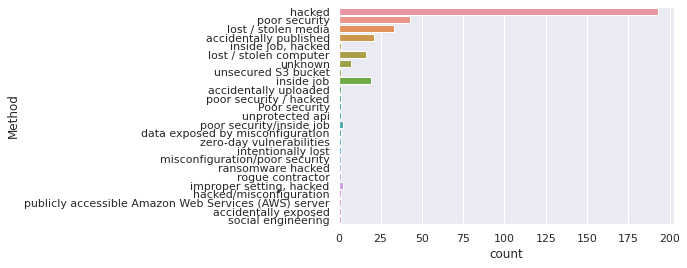

In [26]:
# Method
sns.set(style = "darkgrid")
ax = sns.countplot(y="Method", data = df)

2011             34
2020             31
2019             30
2015             28
2013             28
2018             26
2014             25
2012             23
2016             22
2010             19
2008             16
2021             13
2009             13
2007             12
2017              9
2006              7
2005              6
2022              6
2004              2
2019-2020         1
2018-2019         1
2014 and 2015     1
Name: Year, dtype: int64

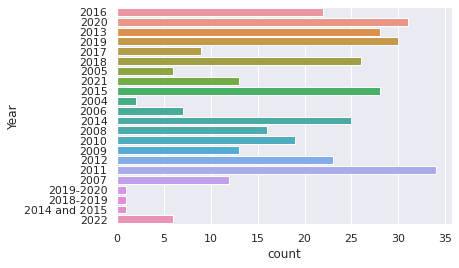

In [43]:
# Year
df["Year"].unique()
# This may or may not work, don't know don't care
# for i in range(0, len(pd.unique(df["Year"]))):
#     try:
#         pd.to_numeric(df.Year[i])
#     except:
#         continue
# df = pd.to_numeric(df_str.Year)
# df.sort_values("Year")
ax = sns.countplot(y="Year", data = df)
df["Year"].value_counts()


In [78]:
# Organization type
df["Organization type"].unique()
org_count =  df["Organization type"].value_counts()
org_count.columns = ["Org_Type", "Count"]
# print(org_count)
org_count.head()
# ax = sns.countplot(y="Organization type", data = df) 
# TODO: figure out how to clean up graph so it doesn't look like dogshit


web           53
healthcare    47
financial     38
government    30
retail        27
Name: Organization type, dtype: int64

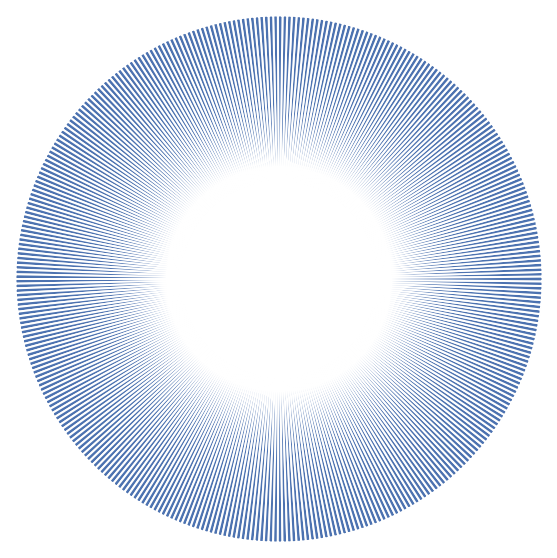

In [73]:
# Continuation of Organization type

# initialize the figure
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Set the coordinates limits
upperLimit = 100
lowerLimit = 30

# Compute max and min in the dataset
max = org_count.max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * org_count[1] + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white")

# # little space between the bar and the label
# labelPadding = 4

# # Add labels
# for bar, angle, height, label in zip(bars,angles, heights, df["Name"]):

#     # Labels are rotated. Rotation must be specified in degrees :(
#     rotation = np.rad2deg(angle)

#     # Flip some labels upside down
#     alignment = ""
#     if angle >= np.pi/2 and angle < 3*np.pi/2:
#         alignment = "right"
#         rotation = rotation + 180
#     else: 
#         alignment = "left"

#     # Finally add the labels
#     ax.text(
#         x=angle, 
#         y=lowerLimit + bar.get_height() + labelPadding, 
#         s=label, 
#         ha=alignment, 
#         va='center', 
#         rotation=rotation, 
#         rotation_mode="anchor") 

<AxesSubplot:xlabel='Records', ylabel='Density'>

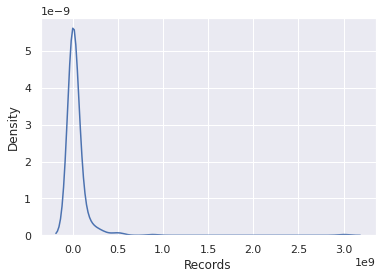

In [66]:
# Records NOT DONE!!!
df["Records"].unique()
df_records_num = pd.to_numeric(df["Records"], errors = "coerce")
# df_records_num = df.loc[df.Records.isnumeric()]
df_records_num.describe
sns.kdeplot(data = df_records_num) # NOT DONE!!!